<a href="https://colab.research.google.com/github/dmika1234/dl_uwr/blob/develop/Assignments/Assignment2/colab_run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import time
from IPython.display import clear_output
from tqdm.auto import tqdm
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision.datasets
from torch import nn

In [2]:
# Colab
%load_ext autoreload
%autoreload
import httpimport
with httpimport.github_repo(
     "dmika1234", "dl_uwr", "develop"
):
     from Assignments.Assignment2.funs import compute_error_rate, plot_history, create_mnist_loaders, SGD, Model, exp_schedule, div_schedule, div_schedule2, check_if_best

In [3]:
# On GPU enabled devices set device='cuda' else set device='cpu'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

### Data download

In [ ]:
batch_size = 128
data_path = "./data"
mnist_loaders = create_mnist_loaders(batch_size=batch_size, data_path=data_path, download=True)

### Defining model

In [137]:
best_val_err = 1.00

In [138]:
alpha = 0.25
epsilon = 0.9
decay=0.0
max_num_epochs = 30
hidden_neurons = 800
gain = 0.1

In [139]:
# lr_schedule = (partial(exp_schedule, beta=0.9, warmups=3), "epochs")
# lr_schedule = (partial(div_schedule, threshold=12), "epochs")
lr_schedule = (partial(div_schedule2, threshold=10), "epochs")
# lr_schedule = (div_schedule, "batch_iters")
# lr_schedule = (None, None)

In [140]:
torch.manual_seed(2137)
model = Model(nn.Linear(28 * 28, hidden_neurons),
              nn.ReLU(),
              nn.Linear(hidden_neurons, hidden_neurons),
              nn.ReLU(),
              nn.Linear(hidden_neurons, 10))
model.init_params_xavier(gain=gain)

### Training

----------------------------------------------------------
After epoch 20 | valid err rate:  1.50% | doing  20 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 13)

------------------------------------------------------------------------------------------------------------------
| Old best validations set error bitten!| Old error: 100.000% | New best error:  1.500% | Saving hyperparameters!|
------------------------------------------------------------------------------------------------------------------


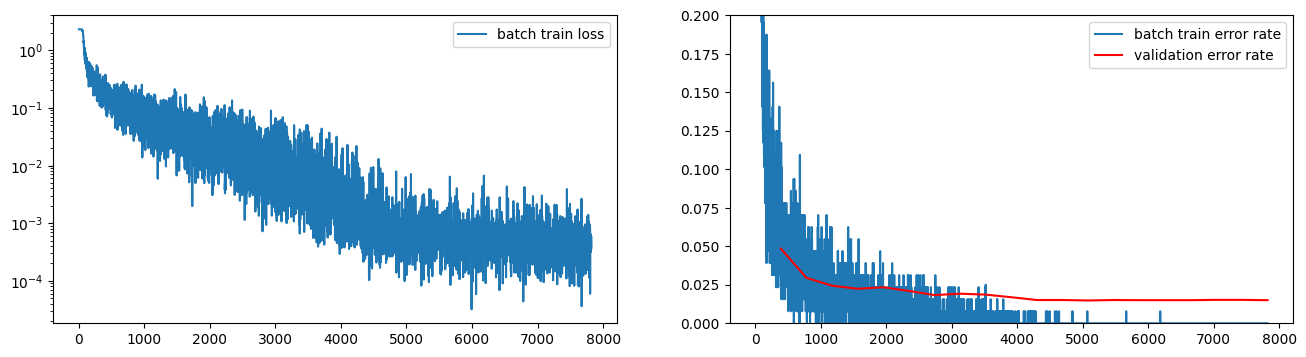

In [141]:
t_start = time.time()
val_err = SGD(model, mnist_loaders,
    alpha=alpha, epsilon=epsilon, lr_schedule=lr_schedule, decay=decay,
    max_num_epochs=max_num_epochs, device=device)
##
best_hypers = check_if_best(val_err, best_val_err, alpha, epsilon, decay, max_num_epochs,
                            lr_schedule, hidden_neurons, gain)


In [142]:
test_err_rate = compute_error_rate(model, mnist_loaders["test"])
m = (
    f"Test error rate: {test_err_rate * 100.0:.3f}%, "
    f"training took {time.time() - t_start:.0f}s."
)
print("{0}\n{1}\n{0}".format("-" * len(m), m))
##

-------------------------------------------
Test error rate: 1.670%, training took 18s.
-------------------------------------------
